# Working with Time Series Data

# I. Temperatures

## Getting to know the data

In [1]:
# General imports for these exercises

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from vega_datasets import data

In [2]:
# Displaying the temperatures data

data.sf_temps()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00
...,...,...
8754,50.4,2010-12-31 19:00:00
8755,49.9,2010-12-31 20:00:00
8756,49.4,2010-12-31 21:00:00
8757,48.8,2010-12-31 22:00:00


In [3]:
# Reassigning the df to a variable

temps = data.sf_temps()
temps.dtypes

temp           float64
date    datetime64[ns]
dtype: object

In [4]:
# Getting general info about the df

temps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [5]:
# Checking to make sure there are no nulls

temps.isnull().sum()

temp    0
date    0
dtype: int64

In [6]:
# Reasssigning the date column as index

temps = temps.set_index('date')
temps.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


## *1. Resample by the day and take the average temperature. Visualize the average temperature over time*

In [8]:
# Setting day as the unit for resampling

pd.Timedelta('1d')

Timedelta('1 days 00:00:00')

In [9]:
# Resampling by the day

temps.resample('D').mean()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667
...,...
2010-12-27,48.991667
2010-12-28,49.000000
2010-12-29,49.012500


<AxesSubplot:title={'center':'Average Daily Temperature'}, xlabel='date'>

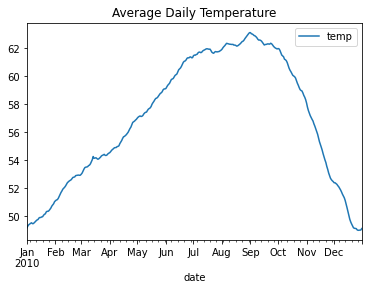

In [10]:
# Plotting the curve of the average daily temp

temps.resample('D').mean().plot(title='Average Daily Temperature')

## *2. Write the code necessary to visualize the minimum temperature over time*

<AxesSubplot:title={'center':'Minimum Daily Temperature'}, xlabel='date'>

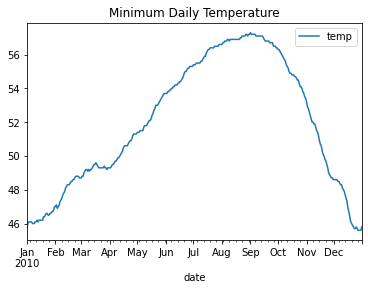

In [11]:
# Plotting the curve of the average daily temp

temps.resample('D').min().plot(title='Minimum Daily Temperature')

## *3. Write the code necessary to visualize the maximum temperature over time*

<AxesSubplot:title={'center':'Maximum Daily Temperature'}, xlabel='date'>

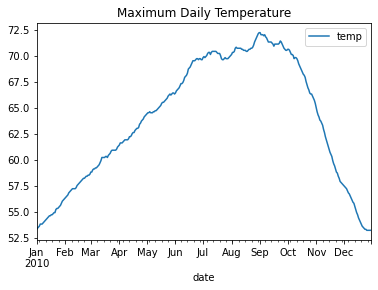

In [12]:
temps.resample('D').max().plot(title='Maximum Daily Temperature')

## *4. Which month is the coldest, on average?*

In [13]:
# Creating a column to hold the months

temps['month'] = temps.index.strftime('%b')

In [22]:
# Displaying the coldest average monthly temp

temps.groupby('month').temp.mean().sort_values().head(1)

# January is the coldest in average

month
Jan    49.98414
Name: temp, dtype: float64

## *5. Which month has the highest average temperature?*

In [15]:
# Displaying the nottest average monthly temp

temps.groupby('month').temp.mean().sort_values(ascending=False)

# September is the hottest in average

month
Sep    62.487083
Aug    62.405376
Jul    61.765457
Jun    60.444722
Oct    60.253091
May    57.970968
Apr    55.633056
Nov    55.185139
Mar    53.956528
Feb    52.243899
Dec    50.498253
Jan    49.984140
Name: temp, dtype: float64

## *6.*

>### a. Resample by the day and calculate the min and max temp for the day

>I noticed that resampling removes the previous column so i'll use a different df for this exercise

In [17]:
# Creating a new df with the min and max columns

temps1 = temps.resample('D').temp.agg(['min', 'max'])
temps1.head()

,min,max
date,,
2010-01-01,45.8,53.3
2010-01-02,46.0,53.4
2010-01-03,46.1,53.5
2010-01-04,46.1,53.6
2010-01-05,46.1,53.8


>### b. Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [19]:
# Creating a column to assign to the temp changes

temps1['temp_change'] = temps1['max'] - temps1['min']

In [23]:
temps1.head()

,min,max,temp_change
date,,,
2010-01-01,45.8,53.3,7.5
2010-01-02,46.0,53.4,7.4
2010-01-03,46.1,53.5,7.4
2010-01-04,46.1,53.6,7.5
2010-01-05,46.1,53.8,7.7


In [27]:
# Creating a month column then getting the max temp change

temps1['month'] = temps1.index.strftime('%b')
temps1.groupby('month').temp_change.max().sort_values().tail(1)

# August has the most temp changes

month
Aug    15.0
Name: temp_change, dtype: float64

## *Bonus question

>### Visualize the daily min, average, and max temperature over time on a single line plot

<AxesSubplot:xlabel='date'>

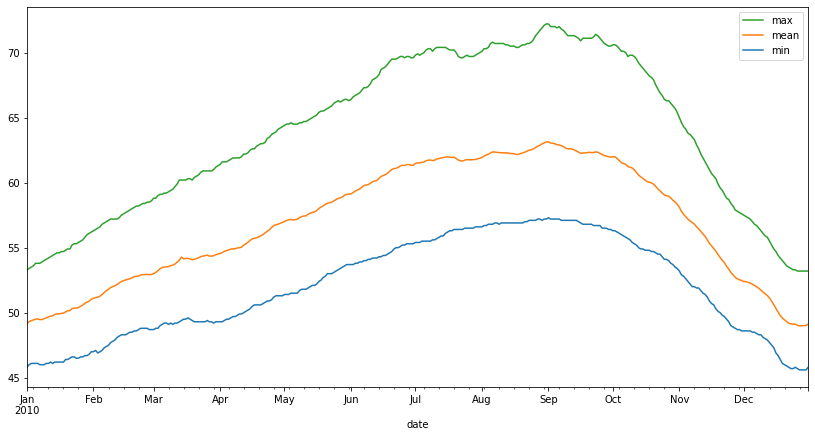

In [52]:
# NB. be careful of multi indexes and aggregating series vs dataframes
# ax = df.plot(alpha=.4, figsize=(14, 7), lw=.2)
temps.resample('D').temp.agg(['min', 'mean', 'max']).plot(figsize=(14, 7), legend='reverse')

# II. Seattle Weather

## Getting to know the data

In [37]:
# Displaying the weather data

data.seattle_weather()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,fog
1457,2015-12-28,1.5,5.0,1.7,1.3,fog
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [38]:
# Reassigning the df to a variable

seattle_weather = data.seattle_weather()
seattle_weather.dtypes

date             datetime64[ns]
precipitation           float64
temp_max                float64
temp_min                float64
wind                    float64
weather                  object
dtype: object

In [39]:
# Getting general info

seattle_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [41]:
# Making sure there are no nulls

seattle_weather.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

## *1. Which year and month combination has the highest amount of precipitation?*

In [43]:
# Setting date as the index

seattle_weather = seattle_weather.set_index('date')

In [44]:
# Reformatting the months and creating the month column

seattle_weather['month'] =seattle_weather.index.strftime('%b')

In [45]:
# Creating a year column

seattle_weather['year'] = seattle_weather.index.year

In [46]:
# Displaying the df

seattle_weather.head()

,precipitation,temp_max,temp_min,wind,weather,month,year
date,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,Jan,2012
2012-01-02,10.9,10.6,2.8,4.5,rain,Jan,2012
2012-01-03,0.8,11.7,7.2,2.3,rain,Jan,2012
2012-01-04,20.3,12.2,5.6,4.7,rain,Jan,2012
2012-01-05,1.3,8.9,2.8,6.1,rain,Jan,2012


In [48]:
# Checking the number of months effectively recorded

seattle_weather.month.nunique()

12

In [47]:
# Checking the number of years

seattle_weather.year.nunique()

4

In [54]:
# Resampling, summing, and reordering

seattle_weather.resample('M').precipitation.sum().sort_values().tail(1)

# December 2015 has the most precipitation

date
2015-12-31    284.5
Name: precipitation, dtype: float64

## *2. Visualize the amount of monthly precipitation over time*

<AxesSubplot:title={'center':'Monthly Precipitation'}, xlabel='date'>

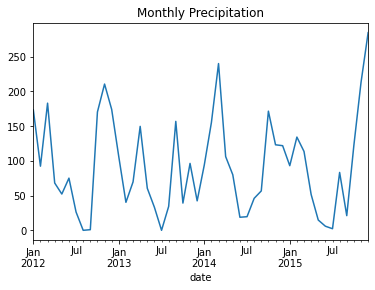

In [59]:
seattle_weather.resample('M').precipitation.sum().plot(title='Monthly Precipitation', )

In [ ]:
sns.lineplot(data=daily, x='date', y='value')

## *3. Visualize the amount of wind over time. Choose a time interval you think is appropriate*

<AxesSubplot:title={'center':'Four-week period Average Wind'}, xlabel='date'>

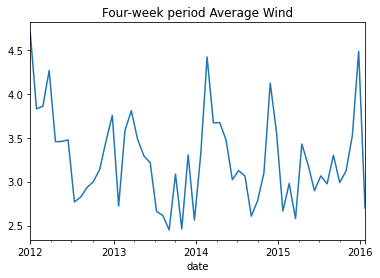

In [70]:
seattle_weather.resample('4w').wind.mean().plot(title='Four-week period Average Wind')

## *4. Which year-month combination is the windiest?*

In [72]:
# Getting the year and month index necessary

seattle_weather.groupby(['year', 'month']).sum().head()

precipitation  temp_max  temp_min   wind
year month                                          
2012 Apr             68.1     446.2     179.8  101.2
     Aug              0.0     801.6     434.3   87.7
     Dec            174.0     224.3     102.1  118.8
     Feb             92.3     269.0      92.9  113.2
     Jan            173.3     218.7      47.8  120.9

In [81]:
# The windiest month of the windiest year

seattle_weather.groupby(['year', 'month']).sum().sort_values(by='wind').tail(1)

# December 2015

,,precipitation,temp_max,temp_min,wind
year,month,,,,
2015,Dec,284.5,259.8,118.6,134.6


## *5. What's the sunniest year?*

In [83]:
# Creating the sunny_days column

seattle_weather['sunny_days'] = seattle_weather.weather == 'sun'

In [84]:
# Displaying the df

seattle_weather.head()

,precipitation,temp_max,temp_min,wind,weather,month,year,sunny_days
date,,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,Jan,2012,False
2012-01-02,10.9,10.6,2.8,4.5,rain,Jan,2012,False
2012-01-03,0.8,11.7,7.2,2.3,rain,Jan,2012,False
2012-01-04,20.3,12.2,5.6,4.7,rain,Jan,2012,False
2012-01-05,1.3,8.9,2.8,6.1,rain,Jan,2012,False


In [89]:
# Grouping by year and sorting to find the sunniest year

seattle_weather.groupby(['year']).sunny_days.mean().sort_values().tail(1)

# 2014 is the sunniest year with about 58% of sun throughout the year

year
2014    0.578082
Name: sunny_days, dtype: float64

## *6. In which month does it rain the most?*

In [96]:
# The rainiest month

seattle_weather.groupby('month').precipitation.sum().sort_values().tail(1)

# November is the rainiest

month
Nov    642.5
Name: precipitation, dtype: float64

## *7. Which month has the most number of days with a non-zero amount of precipitation?*

In [97]:
# Creating the necessary column then finding the desired month

seattle_weather['nonzero_p'] = seattle_weather.precipitation > 0
seattle_weather.groupby('month').nonzero_p.mean().sort_values().tail(1)

# December is the month with the most number of days with a non-zero amount of precipitation

month
Dec    0.653226
Name: nonzero_p, dtype: float64

# III. Flights

### *Getting to know the data*

In [101]:
flights_df = data.flights_20k()

In [102]:
flights_df.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


In [103]:
# Sorting and setting the date as index

flights = flights_df.sort_values(by='date').reset_index(drop=True)
flights = flights.set_index('date')
flights.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,-8,251,MDW,STL
2001-01-01 07:00:00,-10,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


In [104]:
?flights

## *1. Convert any negative delays to 0*

In [112]:
# Converting all negative delays to 0

flights.delay = np.where(flights.delay < 0, 0, flights.delay)

In [115]:
# Checking randomly that zeros are well imputed

flights.sample(10)

,delay,distance,origin,destination
date,,,,
2001-03-16 12:25:00,11,255,BWI,RDU
2001-02-11 15:20:00,4,405,MDW,MCI
2001-03-08 16:50:00,125,369,PHX,BUR
2001-01-14 12:10:00,0,718,ABQ,MCI
2001-03-28 11:34:00,20,1797,LAX,BNA
2001-01-09 07:05:00,7,386,SJC,LAS
2001-01-11 07:30:00,0,480,SAN,SMF
2001-01-31 10:35:00,0,1262,PHX,STL
2001-01-24 11:30:00,0,271,SDF,MDW


## *2. Which hour of the day has the highest average delay?*

In [116]:
flights['hour'] = flights.index.hour
flights.groupby('hour').delay.mean().sort_values().tail(1)

hour
3    302.5
Name: delay, dtype: float64

## *3. Does the day of the week make a difference in the delay amount?*

In [118]:
# Creating the weekday column necessary and sorting them

flights['weekday'] = flights.index.strftime('%w-%a')
flights.groupby('weekday').delay.mean().sort_values()

weekday
1-Mon     7.165772
6-Sat     8.431498
2-Tue     9.410866
0-Sun    10.413542
3-Wed    11.032478
4-Thu    12.821322
5-Fri    17.757596
Name: delay, dtype: float64

## *4. Does the month make a difference in the delay amount?*

In [119]:
# Doing the same with months

flights['month'] = flights.index.strftime('%m-%b')
flights.groupby('month').delay.mean()

# February is the worst month in delays

month
01-Jan    11.301592
02-Feb    12.306106
03-Mar     9.875287
Name: delay, dtype: float64

## *IV. Bonus Exercises*

### *Getting ti know the data*

In [120]:
# Renaming the data

iae = data.iowa_electricity()
iae.head()

,year,source,net_generation
0,2001-01-01,Fossil Fuels,35361
1,2002-01-01,Fossil Fuels,35991
2,2003-01-01,Fossil Fuels,36234
3,2004-01-01,Fossil Fuels,36205
4,2005-01-01,Fossil Fuels,36883


In [121]:
# General info()

iae.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   year            51 non-null     datetime64[ns]
 1   source          51 non-null     object        
 2   net_generation  51 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.3+ KB


In [133]:
iae.source.unique()

array(['Fossil Fuels', 'Nuclear Energy', 'Renewables'], dtype=object)

In [138]:
iae.head()

,source,net_generation
year,,
2001-01-01,Fossil Fuels,35361
2001-01-01,Nuclear Energy,3853
2001-01-01,Renewables,1437
2002-01-01,Fossil Fuels,35991
2002-01-01,Nuclear Energy,4574


In [137]:
iae.year.unique()

AttributeError: 'DataFrame' object has no attribute 'year'

In [134]:
iae = iae.set_index('year').sort_index()

In [135]:
iae.head()

,source,net_generation
year,,
2001-01-01,Fossil Fuels,35361
2001-01-01,Nuclear Energy,3853
2001-01-01,Renewables,1437
2002-01-01,Fossil Fuels,35991
2002-01-01,Nuclear Energy,4574


In [ ]:
df.net_generation.resample('YS').sum()

In [ ]:
iae['year_percent'] = 